In [33]:
import math
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### 生成数据

[[-2.01517299e-01 -6.83358192e-01]
 [ 3.74519467e-01 -8.28082204e-01]
 [-1.61894679e-01 -1.24710655e+00]
 [ 3.77109572e-02 -4.73028421e-02]
 [-2.60479063e-01  1.77020395e+00]
 [ 3.92173350e-01  7.26250887e-01]
 [-5.95546007e-01 -1.45480013e+00]
 [-1.21247292e+00 -1.29884589e+00]
 [-6.24019980e-01 -1.27022302e+00]
 [ 5.35309672e-01  1.39076495e+00]
 [-5.18548071e-01 -4.20369029e-01]
 [-7.85817385e-01 -4.12936896e-01]
 [ 1.86233664e+00  2.97273576e-01]
 [ 2.20532584e+00  9.40952361e-01]
 [ 2.30415082e+00  1.84634805e+00]
 [ 5.08139491e-01  4.80414450e-01]
 [-6.52002320e-02 -3.36982936e-01]
 [ 2.11606994e-01  2.63404042e-01]
 [ 1.18518507e+00  6.80412471e-01]
 [ 2.06560925e-01 -2.72818834e-01]
 [ 5.72373748e-01  4.97517765e-01]
 [-1.36222100e+00 -1.13689065e+00]
 [ 5.22715032e-01  1.08867854e-01]
 [-6.85104549e-01  9.00100052e-01]
 [ 2.75493956e+00  3.13333774e+00]
 [-5.24222016e-01  8.92722532e-02]
 [ 3.26521069e-01  1.82158828e+00]
 [-9.18118298e-01 -9.54474151e-01]
 [ 1.03769712e-01 -4

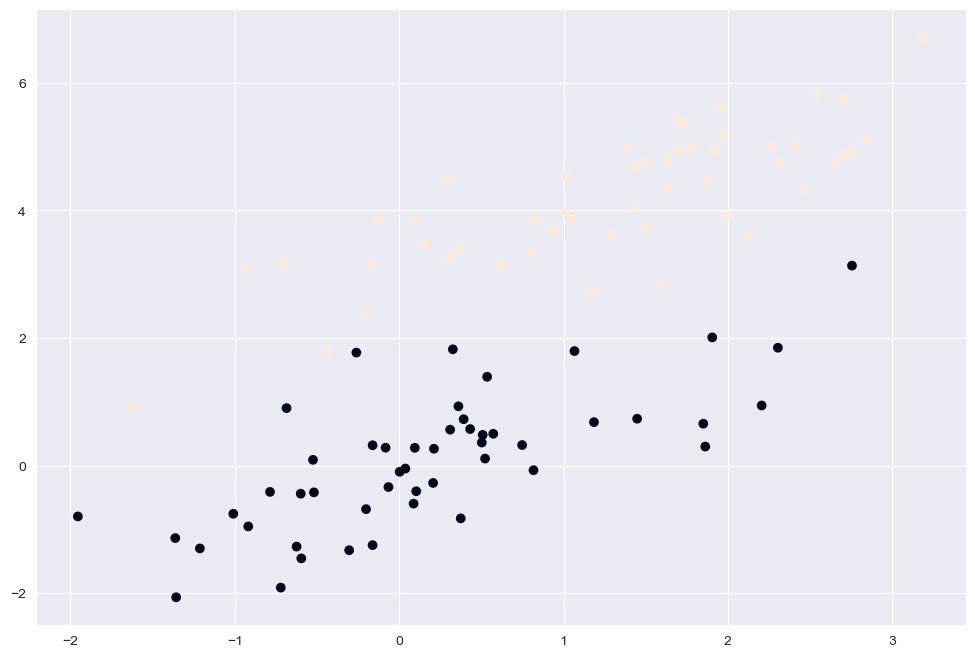

In [34]:
# generate data
np.random.seed(12)
num_observations = 50

# 生成多元正态分布矩阵
x1 = np.random.multivariate_normal([0,0], [[1,.75],[.75,1]], num_observations)  # 返回形状为 (50, 2) 的矩阵, (num_observations, len(mean))
x2 = np.random.multivariate_normal([1,4], [[1,.75],[.75,1]], num_observations)

# 100个数据，两个特征， 两个标签-1 or 1
X = np.vstack((x1,x2)).astype(np.float32)  # vstack: 两个数组纵向合并
y = np.hstack((np.zeros(num_observations),
               np.ones(num_observations)))  # hstack：两个数组横向合并成一个新的array
y = np.where(y<=0, -1, 1)
print(X)
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c = y, alpha=.99)  # c: color, alpha: transparency

In [35]:
def gradient(w, X, y, b, lr):
    for i in range(2000):
        for idx, x_i in enumerate(X):
            y_i = y[idx]
            cond = y_i*(np.dot(w, x_i)-b) >= 1
            if cond:
                w-=lr*2*w
            else:
                w-=lr*(2*w - np.dot(x_i,y_i))
                b-=lr*y_i
    return w,b

In [36]:
# 生成形状为（1，2）的随机vector， 截距， 学习率
w, b, lr = np.random.random(X.shape[1]), 0, 0.0001
w, b = gradient(w, X, y, b, lr)

In [37]:
def predict(X,w,b):
    pred = np.dot(X,w) - b
    return np.sign(pred)

In [38]:
svm_pred = predict(X,w,b)

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(X,y)
y_pred = clf.predict(X)
print(accuracy_score(y, y_pred))

0.98
